# Regresión lineal - Predicción del revenue en compañías de Fortune 1000

In [ ]:
!conda search seaborn

In [ ]:
!conda install --name ks-sl seaborn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
!curl -o data/1000_Companies.csv https://raw.githubusercontent.com/boosuro/profit_estimation_of_companies/master/1000_Companies.csv

In [2]:
# Importamos el dataset y extraemos las variables dependiente e independiente
companies = pd.read_csv('data/1000_Companies.csv')
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

In [3]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


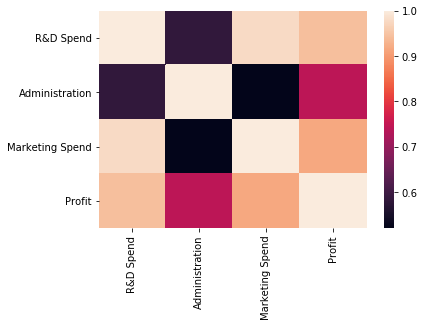

In [4]:
# Ahora visualizamos los datos
# Lo primero será usar Seaborn para visualizar la matriz de correlación
sns.heatmap(companies.corr())

In [ ]:
X

Seaborn es estupendo porque reconoce el formato de Pandas Dataframes. Hemos alimentado el heatmap de Seaborn con una correlación por pares de columnas con la función correspondiente que nos suministra Pandas ([corr()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)). 

Ahora vamos a preparar algo los datos para que el entrenamiento se realice correctamente.

Primero, transformamos los nombres de las ciudades en etiquetas numéricas gracias a `LabelEncoder`. Por último, al no significar nada un valor numérico de la etiqueta de ciudad por encima de otro, aplicamos la técnica de `OneHotEncoder`:

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

In [ ]:
X

In [ ]:
transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [3])],remainder='passthrough')
X = np.array(transformer.fit_transform(X), dtype=np.float)

#Esto también funciona en vez del código anterior, pero se depreca en Scikit-Learn 0.22
#onehotencoder = OneHotEncoder(categorical_features=[3])
#X = onehotencoder.fit_transform(X).toarray()

In [ ]:
print(X)

Ahora eliminamos el problema llamado *dummy variable trap*, derivado del hecho de que como resultado de la codificación categórica de la ciudad estamos introduciendo una alta correlación ([más información](https://analyticstraining.com/understanding-dummy-variable-traps-regression/)):

In [ ]:
X = X[:,1:]

Finalmente, creamos nuestro modelo de regresión lineal, preparando primero como siempre los datasets de training y de test:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

Y, como no, hacemos la predicción:

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

In [ ]:
print(regressor.coef_)

In [ ]:
print(regressor.intercept_)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)